In [1]:
import pickle
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
import plotly.io as pio
pio.templates.default = "simple_white"

# Reading the data

In [3]:
# Getting the data and storing in pandas df

data_list = pickle.load( open( "data_list.pickle", "rb" ) )
xkcd_df = pd.DataFrame(data_list)

In [4]:
xkcd_df.head()

,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts
0,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1,NaN
1,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1,NaN
2,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1,NaN
3,1,4,,2006,,Landscape (sketch),[[A sketch of a landscape with sun on the hori...,There's a river flowing through the ocean,https://imgs.xkcd.com/comics/landscape_cropped...,Landscape (sketch),1,NaN
4,1,5,,2006,,Blown apart,[[A black number 70 sees a red package.]]\n70:...,Blown into prime factors,https://imgs.xkcd.com/comics/blownapart_color.jpg,Blown apart,1,NaN


In [5]:
xkcd_df.iloc[1400]["transcript"]

"NUMBER OF HARPOONS IN SPACE\nby year\n[[A line graph with the x-axis numbered from 1950-2020 in ten year increments an the y-axis numbered 0-3. A red line rests at 0 until 1970 at which pints it spikes to 1, which is labeled 'Apollo 12 rum incident'. It return to 0 and shoots up to 2 at 2004. This is marked 'Rosetta Comet Mission launched carrying lander with harpoon tethers'. The line plateaus at 2 into the future.]]\n\n{{Title text: To motivate it to fire its harpoons hard enough, Rosetta's Philae lander has been programmed to believe it is trying to kill the comet.}}"

In [6]:
xkcd_df.iloc[1400]["alt"]

"To motivate it to fire its harpoons hard enough, Rosetta's Philae lander has been programmed to believe it is trying to kill the comet."

# Cleaning the trasncripts

The description of the strip seems to be everything between [].

In [7]:
import re

s = xkcd_df.iloc[1400]["transcript"]
start = '\[\['
end = '\]\]'

result = re.search('%s(.*)%s' % (start, end), s).group(1)
print(result)

A line graph with the x-axis numbered from 1950-2020 in ten year increments an the y-axis numbered 0-3. A red line rests at 0 until 1970 at which pints it spikes to 1, which is labeled 'Apollo 12 rum incident'. It return to 0 and shoots up to 2 at 2004. This is marked 'Rosetta Comet Mission launched carrying lander with harpoon tethers'. The line plateaus at 2 into the future.


In [8]:
xkcd_df.columns

Index(['month', 'num', 'link', 'year', 'news', 'safe_title', 'transcript',
       'alt', 'img', 'title', 'day', 'extra_parts'],
      dtype='object')

In [10]:
# # Creating 'description' column
# start = '\[\['
# end = '\]\]'

# xkcd_df['description'] = xkcd_df['transcript'].apply(lambda s: re.search('%s(.*)%s' % (start, end), s).group(1))

Ops, so not all transcripts contain the [] brackets!

In [11]:
xkcd_df[xkcd_df['transcript'].str.contains('\[\[')]

,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts
0,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1,NaN
1,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1,NaN
2,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1,NaN
3,1,4,,2006,,Landscape (sketch),[[A sketch of a landscape with sun on the hori...,There's a river flowing through the ocean,https://imgs.xkcd.com/comics/landscape_cropped...,Landscape (sketch),1,NaN
4,1,5,,2006,,Blown apart,[[A black number 70 sees a red package.]]\n70:...,Blown into prime factors,https://imgs.xkcd.com/comics/blownapart_color.jpg,Blown apart,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1667,4,1669,,2016,,Planespotting,[[A man sits on a medical examination table. H...,"No, a hydroplane doesn't land on water--that's...",https://imgs.xkcd.com/comics/planespotting.png,Planespotting,18,NaN
1669,4,1671,,2016,,Arcane Bullshit,"[[A figure sits at a desk, using a laptop. A v...",Learning arcane bullshit from the 80s can brea...,https://imgs.xkcd.com/comics/arcane_bullshit.png,Arcane Bullshit,22,NaN
1670,4,1672,,2016,,Women on 20s,"[[Two figures stand, in silhouette, looking at...",I get that there are security reasons for the ...,https://imgs.xkcd.com/comics/women_on_20s.png,Women on 20s,25,NaN
1671,4,1673,,2016,,Timeline of Bicycle Design,[[Black hat guy stands halfway up a stepladder...,I'll be honest--the 1950s were a rough time fo...,https://imgs.xkcd.com/comics/timeline_of_bicyc...,Timeline of Bicycle Design,27,NaN


In [12]:
len(xkcd_df)

2642

Let's remove all non alphanumeric characters so we can deal with text in transcripts:

In [13]:
s2 = xkcd_df.iloc[1672]["transcript"]

# [^\w] will match anything that's not alphanumeric or underscore.
re.sub(r'[^\w]', ' ', s2)

'  This comic is a 1D chart  from least to most willing  of tolerance to deal with technical arcana  A stick figure labelled  me  stands at the central point    Willingness to wade through some 80 s programmer s arcane bullshit   Low  Never learn to program Me  Learn enough to break everything but not enough to fix it High  Spend all your time compiling kernels and never make anything    Title text  Learning arcane bullshit from the 80s can break your computer  but if you re willing to wade through arcane bullshit from programmers in the 90s and 2000s  you can break everyone else s computers  too   '

In [14]:
xkcd_df['clean_transcript'] = xkcd_df['transcript'].apply(lambda s: re.sub(r'[^\w]', ' ', s))

In [62]:
xkcd_df.head(3)

,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts,clean_transcript
0,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1,NaN,A boy sits in a barrel which is floating in ...
1,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1,NaN,Two trees are growing on opposite sides of a...
2,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1,NaN,A sketch of an Island Alt Hello island


# Seeing the comic strip

In [16]:
from PIL import Image
import requests

url = xkcd_df.iloc[241]['img']

im = Image.open(requests.get(url, stream=True).raw)

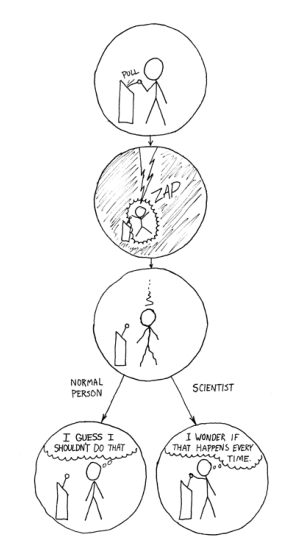

In [23]:
plt.figure(figsize = (10,10))
plt.imshow(im, cmap='gray', aspect='equal')
plt.axis('off');

To set up a "show strip" function, we'll use the number of the strip as input as it is a unique indentifier. Let's first run a quick sanity check to see if it is indeed unique:

In [24]:
xkcd_df['num'].nunique()

2642

In [25]:
len(xkcd_df)

2642

Cool, the number of unique `num`s matches the number of elements in our dataframe!

In [60]:
def show_strip(num):
    # Get url for strip
    url = xkcd_df.query(f"num == {num}")["img"].iloc(0)[0]

    im = Image.open(requests.get(url, stream=True).raw)

    plt.figure(figsize = (12,12))
    plt.imshow(im, cmap='gray', aspect='equal')
    plt.axis('off');

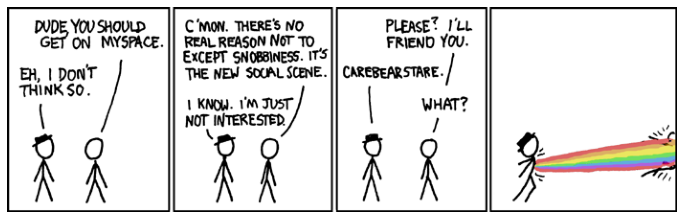

In [61]:
show_strip(146)

Great, it works!

# Analyzing transcripts

In [63]:
xkcd_df.head(3)

,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts,clean_transcript
0,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1,NaN,A boy sits in a barrel which is floating in ...
1,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1,NaN,Two trees are growing on opposite sides of a...
2,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1,NaN,A sketch of an Island Alt Hello island


## Processing using spacy

[Here](https://realpython.com/natural-language-processing-spacy-python/#what-are-nlp-and-spacy) is a great article!

We'll use the `clean_transcript` to do all processing.

### Converting everything to lower case

In [71]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [72]:
xkcd_df['clean_transcript'] = xkcd_df['clean_transcript'].str.lower()

Let's move the new column to the front for a better visual:

In [73]:
xkcd_df.insert(0, 'clean_transcript', xkcd_df.pop('clean_transcript'))

In [74]:
xkcd_df.head()

,clean_transcript,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts
0,a boy sits in a barrel which is floating in ...,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1,NaN
1,two trees are growing on opposite sides of a...,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1,NaN
2,a sketch of an island alt hello island,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1,NaN
3,a sketch of a landscape with sun on the hori...,1,4,,2006,,Landscape (sketch),[[A sketch of a landscape with sun on the hori...,There's a river flowing through the ocean,https://imgs.xkcd.com/comics/landscape_cropped...,Landscape (sketch),1,NaN
4,a black number 70 sees a red package 70 ...,1,5,,2006,,Blown apart,[[A black number 70 sees a red package.]]\n70:...,Blown into prime factors,https://imgs.xkcd.com/comics/blownapart_color.jpg,Blown apart,1,NaN


### Removing stopwords

First we'll create a function that takes a string (text) and returns a string with no stopwords (using spacy).

In [75]:
def text_no_stop_words(s):
    text_content = s

    doc = nlp(text_content)
    # The .orth_ attribute returns a string representation of the token
    no_stopword_doc = [token.orth_ for token in doc if not token.is_stop]
    
    return " ".join(no_stopword_doc)

In [76]:
text_no_stop_words(xkcd_df['clean_transcript'][0])

'   boy sits barrel floating ocean     boy   wonder ll float     barrel drifts distance   seen       alt   don t   '

Now we can apply the function to the column:

In [77]:
xkcd_df['clean_transcript'] = xkcd_df['clean_transcript'].apply(text_no_stop_words)

In [78]:
xkcd_df.head()

,clean_transcript,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts
0,boy sits barrel floating ocean boy wo...,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1,NaN
1,trees growing opposite sides sphere a...,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1,NaN
2,sketch island alt hello island,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1,NaN
3,sketch landscape sun horizon alt s r...,1,4,,2006,,Landscape (sketch),[[A sketch of a landscape with sun on the hori...,There's a river flowing through the ocean,https://imgs.xkcd.com/comics/landscape_cropped...,Landscape (sketch),1,NaN
4,black number 70 sees red package 70 h...,1,5,,2006,,Blown apart,[[A black number 70 sees a red package.]]\n70:...,Blown into prime factors,https://imgs.xkcd.com/comics/blownapart_color.jpg,Blown apart,1,NaN


### Removing unwanted white space

There are a lot of white spaces in our text! Let's remove them:

In [84]:
xkcd_df.iloc[0]['clean_transcript']

'   boy sits barrel floating ocean     boy   wonder ll float     barrel drifts distance   seen       alt   don t   '

In [85]:
xkcd_df['clean_transcript'] = xkcd_df['clean_transcript'].apply(lambda s: " ".join(s.split()))

In [86]:
xkcd_df.iloc[0]['clean_transcript']

'boy sits barrel floating ocean boy wonder ll float barrel drifts distance seen alt don t'

Much better!

### Lemmatization

> Lemmatization is the process of reducing inflected forms of a word while still ensuring that the reduced form belongs to the language. This reduced form or root word is called a lemma.

> For example, organizes, organized and organizing are all forms of organize. Here, organize is the lemma. The inflection of a word allows you to express different grammatical categories like tense (organized vs organize), number (trains vs train), and so on. Lemmatization is necessary because it helps you reduce the inflected forms of a word so that they can be analyzed as a single item. It can also help you normalize the text.

> spaCy has the attribute lemma_ on the Token class. This attribute has the lemmatized form of a token.

As before, we'll create a function that takes strings and returns the lemmatized version of the text.

In [87]:
def text_lemmatized(s):
    text_content = s

    doc = nlp(text_content)
    # The .orth_ attribute returns a string representation of the token
    lemmatized_doc = [token.lemma_ for token in doc]
    
    return " ".join(lemmatized_doc)

In [88]:
text_lemmatized(xkcd_df['clean_transcript'][0])

'boy sit barrel float ocean boy wonder ll float barrel drift distance see alt don t'

Now we apply to the whole column:

In [89]:
xkcd_df['clean_transcript'] = xkcd_df['clean_transcript'].apply(text_lemmatized)

In [90]:
xkcd_df.head()

,clean_transcript,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts
0,boy sit barrel float ocean boy wonder ll float...,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1,NaN
1,tree grow opposite side sphere alt title petit...,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1,NaN
2,sketch island alt hello island,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1,NaN
3,sketch landscape sun horizon alt s river flow ...,1,4,,2006,,Landscape (sketch),[[A sketch of a landscape with sun on the hori...,There's a river flowing through the ocean,https://imgs.xkcd.com/comics/landscape_cropped...,Landscape (sketch),1,NaN
4,black number 70 see red package 70 hey package...,1,5,,2006,,Blown apart,[[A black number 70 sees a red package.]]\n70:...,Blown into prime factors,https://imgs.xkcd.com/comics/blownapart_color.jpg,Blown apart,1,NaN


### Adding word count

For this new feature we'll use the full `transcript` (not cleaned). This way, we can measure the true amount of words (or tokens, I should say) each transcript has. As before, let's build a function that takes a raw string and returns the number of tokens in it.

In [91]:
def word_count(s):
    text_content = s

    doc = nlp(text_content)
    
    return len(doc)

In [93]:
word_count(xkcd_df['transcript'][0])

58

In [94]:
xkcd_df['word_count'] = xkcd_df['transcript'].apply(word_count)

Let's see the distribution of word counts:

In [95]:
fig = px.histogram(xkcd_df,
                   x='word_count',
                   title = 'Word count distribution - xkcd transcripts')
fig.show()

There are lots of very short transcripts. Let's inspect these ones:

In [103]:
xkcd_df.query("word_count == 0").tail(20)

,clean_transcript,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts,word_count
2622,,5,2624,,2022,,Voyager Wires,,"Also, they're getting increasingly worried tha...",https://imgs.xkcd.com/comics/voyager_wires.png,Voyager Wires,25,NaN,0
2623,,5,2625,,2022,,Field Topology,,The combination croquet set/10-lane pool can a...,https://imgs.xkcd.com/comics/field_topology.png,Field Topology,27,NaN,0
2624,,5,2626,,2022,,d65536,,They're robust against quantum attacks because...,https://imgs.xkcd.com/comics/d65536.png,d65536,30,NaN,0
2625,,6,2627,,2022,,Types of Scopes,,An x-ray gyroscope is used to determine exactl...,https://imgs.xkcd.com/comics/types_of_scopes.png,Types of Scopes,1,NaN,0
2626,,6,2628,,2022,,Motion Blur,,"I can't speak for your other subjects, but MY ...",https://imgs.xkcd.com/comics/motion_blur.png,Motion Blur,3,NaN,0
2627,,6,2629,,2022,,Or Whatever,,"Oh yeah, I didn't even know they renamed it th...",https://imgs.xkcd.com/comics/or_whatever.png,Or Whatever,6,NaN,0
2628,,6,2630,,2022,,Shuttle Skeleton,,It's believed to be related to the Stellar Sea...,https://imgs.xkcd.com/comics/shuttle_skeleton.png,Shuttle Skeleton,8,NaN,0
2629,,6,2631,,2022,,Exercise Progression,,"They said after I got into a routine, I'd enjo...",https://imgs.xkcd.com/comics/exercise_progress...,Exercise Progression,10,NaN,0
2630,,6,2632,,2022,,Greatest Scientist,,"""Ow! One of the petri dishes I left on the tow...",https://imgs.xkcd.com/comics/greatest_scientis...,Greatest Scientist,13,NaN,0
2631,,6,2633,,2022,,Astronomer Hotline,,Employment statistics have to correct for the ...,https://imgs.xkcd.com/comics/astronomer_hotlin...,Astronomer Hotline,15,NaN,0


Let's see one of these:

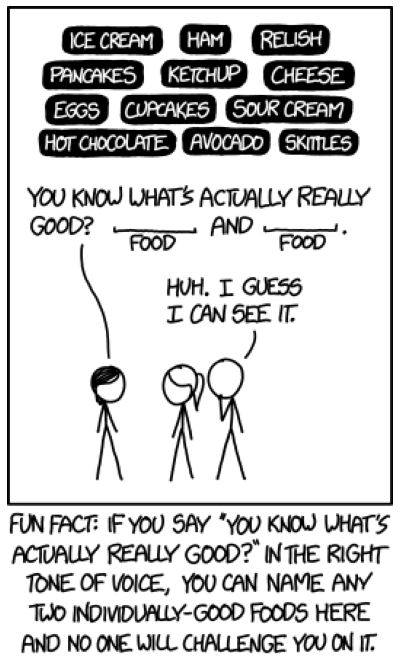

In [99]:
show_strip(1609)

In [101]:
xkcd_df.query("alt == ''")

,clean_transcript,month,num,link,year,news,safe_title,transcript,alt,img,title,day,extra_parts,word_count
1191,dynamic image different mouse over mouse over ...,4,1193,,2013,,Externalities,((This is a dynamic image with several differe...,,https://imgs.xkcd.com/comics/externalities.png,Externalities,1,"{'pre': '', 'headerextra': ' <style type=""te...",557
1504,title text randall monologue official xkcd des...,4,1506,//xkcd.com/1506/,2015,,xkcloud,{{Title text: }}\n[[Randall monologues behind ...,,https://imgs.xkcd.com/comics/xkcloud.png,xkcloud,1,"{'pre': '', 'headerextra': '', 'post': ' <scri...",228
1523,emojic 8 ball text box enter question default ...,5,1525,https://xkcd.com/1525/,2015,,Emojic 8 Ball,EMOJIC 8 BALL\n[[A text box where you can ente...,,https://imgs.xkcd.com/comics/emojic_8_ball.png,Emojic 8 Ball,15,"{'headerextra': ' <link rel=""stylesheet"" type=...",80


## Try something else!

The issue is that the author stopped making transcripts after a while. More than 900 strips are missing the transcripts, which does complicated our analysis...

However, we can go to [Explain XKCD](https://www.explainxkcd.com/) and find all transcripts there, yay! We just have to code a scraper for it.